In [127]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# read_csv converts to DataFrame
applied = pd.read_csv('../Data/assylum/assylum_applications_raw.csv')
accepted = pd.read_csv('../Data/assylum/assylum_applications_accepted_raw.csv')

In [128]:
applied.rename(columns={'OBS_VALUE': 'count_applied'}, errors='raise', inplace = True)
accepted.rename(columns={'OBS_VALUE' : 'count_accepted'}, inplace = True)

398 397
Countries to choose from: {'Malta', 'Slovakia', 'European Union - 27 countries (from 2020)', 'Montenegro', 'Cyprus', 'Poland', 'Latvia', 'Denmark', 'Portugal', 'Czechia', 'Sweden', 'Slovenia', 'Croatia', 'Norway', 'France', 'Switzerland', 'Greece', 'Netherlands', 'Spain', 'United Kingdom', 'Lithuania', 'Bulgaria', 'Iceland', 'Romania', 'Italy', 'Austria', 'Ireland', 'Belgium', 'Finland', 'Estonia', 'Germany', 'Liechtenstein', 'Hungary', 'Luxembourg'}


,count_applied,count_accepted,year
country,,,
European Union - 27 countries (from 2020),8717385,262465,22198
Germany,3281775,121380,24222
France,1374205,82375,24222
Italy,989580,6320,24222
Spain,849430,295,24222
Greece,529055,7330,24222
Sweden,504455,10485,24222
Austria,478265,30640,24222
Belgium,328105,5090,24222


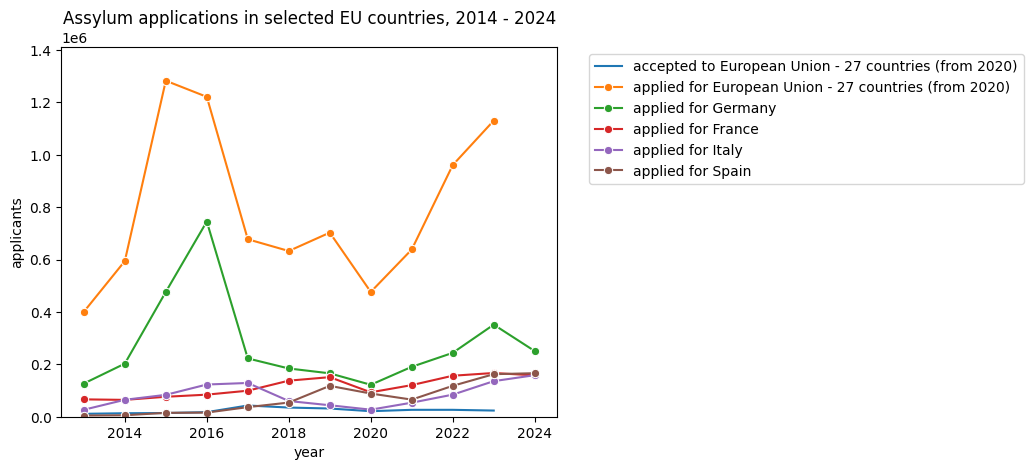

In [129]:

print(len(applied), len(accepted))
# applied is longer by one row, so we need to merge both dataframes
joined = pd.merge(applied, accepted, on = ['TIME_PERIOD', 'geo',], how = 'inner')

# we only need a few of the columns:
assylum_table = pd.DataFrame({'count_applied' : joined['count_applied'], 
                              'count_accepted' : joined['count_accepted'],
                              'country': joined['geo'], 
                              'year': joined['TIME_PERIOD'] })

# display(assylum_table)
# display(accepted)
# display(applied)

def draw_asyllum(name, applied = True, accepted=False):
    a_country = assylum_table.query("country == @name").set_index('year')

    if applied:
        a = sns.lineplot(data = a_country, x = 'year', y = 'count_applied', label = f'applied for {name}', marker= 'o')
    if accepted:
        a = sns.lineplot(data = a_country, x = 'year', y = 'count_accepted', label = f'accepted to {name}')

    a.set_title(f'Assylum applications in selected EU countries, 2014 - 2024')
    if applied:
        upper_y = 1.1 * assylum_table['count_applied'].max()
    else:
        upper_y = 1.1 * assylum_table['count_accepted'].max()

    a.set_ylim(ymin= 0, ymax = upper_y )
    a.set_ylabel('applicants')
    a.legend(bbox_to_anchor=(1.05, 1), loc=2)

print('Countries to choose from:', set(assylum_table['country']))


# Plot the top 5 countries with the most applications:
top = assylum_table.groupby(by = 'country').sum().sort_values(by = 'count_applied', ascending=False)
display(top)
g = draw_asyllum(top.index[0], applied = False, accepted=True)
for country in top.index[0:5]:
    g = draw_asyllum(country)

Average acceptance rate: 0.02362530943936592


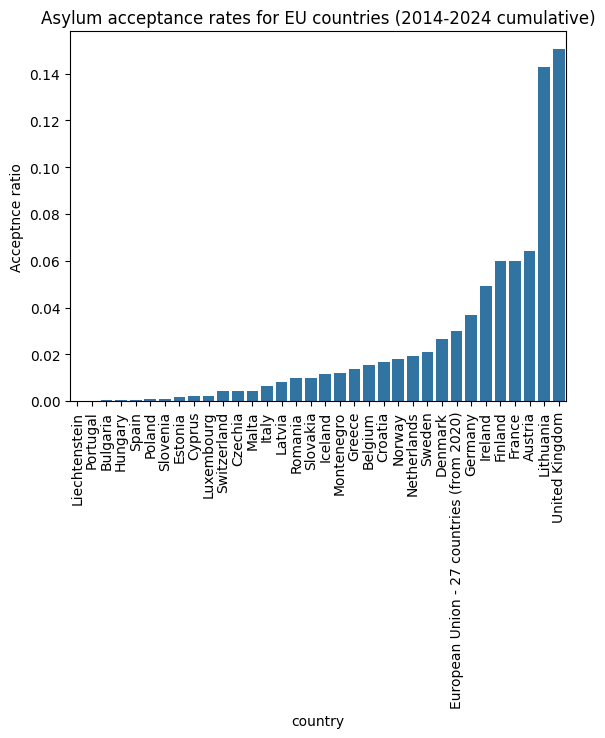

In [252]:

# which country is the most generous? not so easy to tell...
# -> compute ratios of acceptance for each country and plot as bar plot
top['b_ratio'] = top['count_accepted'] / top['count_applied']
top.sort_values(by = 'b_ratio', inplace = True)

a = sns.barplot(data = top, x = 'country', y = 'b_ratio')
a.set_ylabel('Acceptnce ratio')
a.set_title('Asylum acceptance rates for EU countries (2014-2024 cumulative)')
plt.xticks(rotation = 90)
pass
print('Average acceptance rate:', top['b_ratio'].mean())

In [131]:
populations = pd.read_csv('../Data/population.csv')
pop_2020 = populations.query("TIME_PERIOD == 2020")
selected_countries = set(top.index) 
total_pop = pop_2020.query("geo in @selected_countries")

# display(pop_2020)
# display(total_pop)
# checking if no country is missing:
k = set(total_pop['geo'])
print(selected_countries - k,  k - selected_countries)    
print(len(total_pop), len(top))

total_pop.sort_values('geo', ascending=True, inplace = True)
top.sort_index(ascending=True, inplace=True)

# finally add column to "top" dataframe  # to_numpy creates a clean array without index.
top['population'] = total_pop['OBS_VALUE'].to_numpy()
top.drop(columns = 'year', inplace = True)
display(top)

set() set()
34 34


C:\Users\adize\AppData\Local\Temp\ipykernel_17736\2352488579.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  total_pop.sort_values('geo', ascending=True, inplace = True)


,count_applied,count_accepted,b_ratio,population
country,,,,
Austria,478265,30640,0.064065,8901064
Belgium,328105,5090,0.015513,11522440
Bulgaria,136100,35,0.000257,6569275
Croatia,16890,285,0.016874,3933511
Cyprus,98670,200,0.002027,888005
Czechia,16890,75,0.004440,10693939
Denmark,71310,1905,0.026714,5822763
Estonia,9460,15,0.001586,1328976
European Union - 27 countries (from 2020),8717385,262465,0.030108,447015600


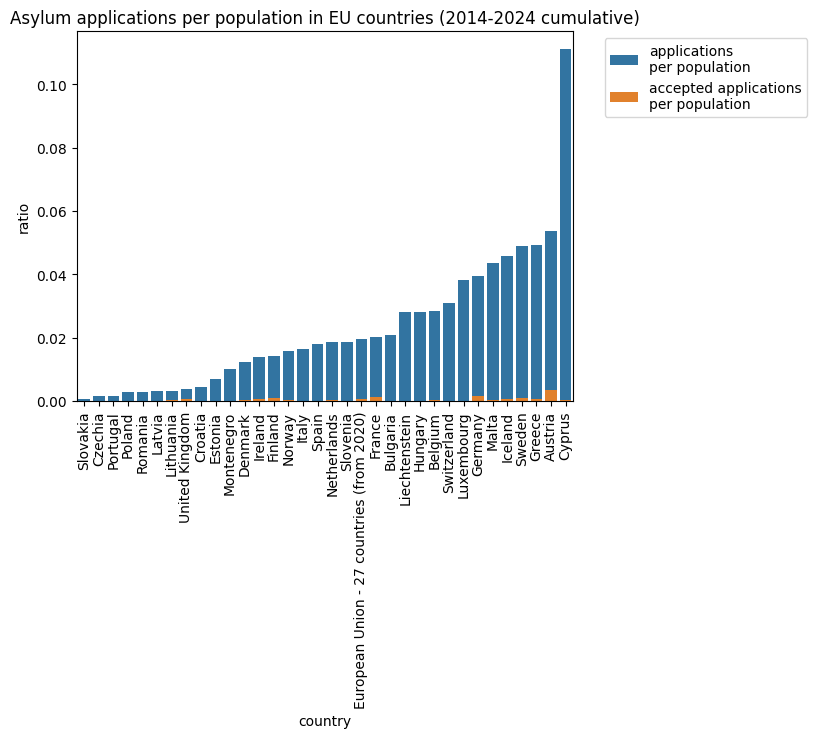

In [132]:
# just a simple bar plot:
top['app_ratio'] = top['count_applied'] / top['population']
top['acc_ratio'] = top['count_accepted'] / top['population']
top.sort_values(by = 'app_ratio', inplace = True)
p = sns.barplot(data = top, x = 'country', y = 'app_ratio', label = 'applications\nper population')
p = sns.barplot(data = top, x = 'country', y = 'acc_ratio', label = 'accepted applications\nper population')
p.set_ylabel('ratio')
p.set_title('Asylum applications per population in EU countries (2014-2024 cumulative)')
plt.xticks(rotation = 90)
p.legend(bbox_to_anchor=(1.05, 1), loc=2)
pass

In [133]:
# Hypothesis: countries with more immigrants have a higher asylum acceptance rate.
url = "../Data/Annual_population_eurostat(mandatory).csv"
all_population = pd.read_csv(url)
print(set(all_population['citizen']))

# explanation for column names:
# NAT = Reporting country (national citizens) 
# FOR = foreign countries
# STLS = stateless
# NEY28_FOR = Other non-EU countries (other non-EU citizens)
# EU28_FOR = Other EU countries (other EU citizens)
# UNK = unknown.

display(all_population)


{'STLS', 'TOTAL', 'NEU28_FOR', 'EU28_FOR', 'NAT', 'UNK'}


,Country,ISO3,citizen,sex,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024
0,Austria,AUT,EU28_FOR,F,288028.0,310759.0,329981.0,348012.0,365125.0,383295.0,NaN,NaN,NaN,NaN
1,Belgium,BEL,EU28_FOR,F,416232.0,428008.0,434889.0,440355.0,448655.0,457258.0,NaN,NaN,NaN,NaN
2,Switzerland,CHE,EU28_FOR,F,594052.0,610566.0,622893.0,630371.0,637330.0,645916.0,NaN,NaN,NaN,NaN
3,Cyprus,CYP,EU28_FOR,F,55730.0,57716.0,57673.0,59787.0,63044.0,62935.0,NaN,NaN,NaN,NaN
4,Czechia,CZE,EU28_FOR,F,72465.0,76736.0,81670.0,86132.0,91296.0,96186.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
571,Romania,ROU,UNK,T,28.0,48.0,65.0,61.0,177.0,303.0,77.0,NaN,1.0,1250.0
572,Sweden,SWE,UNK,T,8220.0,9601.0,10784.0,11497.0,12122.0,12806.0,13069.0,12633.0,11051.0,9756.0
573,Slovenia,SVN,UNK,T,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
574,Slovakia,SVK,UNK,T,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2924.0,2905.0,2999.0


In [134]:
outside_EU_foreign = all_population.query("citizen == 'NEU28_FOR' and sex == 'T'").loc[:, ['2020', 'Country']]
outside_EU_foreign.set_index('Country', inplace = True)
print(selected_countries - set(outside_EU_foreign.index))
print(set(outside_EU_foreign.index) - selected_countries)
display(outside_EU_foreign)

{'United Kingdom', 'Bulgaria', 'European Union - 27 countries (from 2020)', 'Montenegro', 'Greece'}
{'Turkey'}


,2020
Country,
Austria,700601.0
Belgium,496596.0
Switzerland,742749.0
Cyprus,42204.0
Czechia,341646.0
Germany,5932244.0
Denmark,298005.0
Estonia,178791.0
Spain,3344102.0


In [135]:
# I will add data manually:
completing = pd.DataFrame([{'European Union - 27 countries (from 2020)' : 29000000,
                          'United Kingdom':  10388000,
                          'Bulgaria' : 200000,
                          'Montenegro': 122744,
                          'Greece' : 1340456,
                          'Norway' : 931000}]).melt().rename(columns = {'variable':'Country', 'value': '2020'}).set_index('Country')

outside_EU_foreign.drop(['Norway', 'Turkey'], inplace = True)

display(completing)

outside_EU_foreign = pd.concat([outside_EU_foreign, completing], axis = 0)

display(outside_EU_foreign)


print(len(top))
print(len(outside_EU_foreign))

,2020
Country,
European Union - 27 countries (from 2020),29000000
United Kingdom,10388000
Bulgaria,200000
Montenegro,122744
Greece,1340456
Norway,931000


,2020
Country,
Austria,700601.0
Belgium,496596.0
Switzerland,742749.0
Cyprus,42204.0
Czechia,341646.0
Germany,5932244.0
Denmark,298005.0
Estonia,178791.0
Spain,3344102.0


34
34


In [136]:
print(set(top.index) == set(outside_EU_foreign.index))
outside_EU_foreign.rename_axis('country', inplace = True)
top = pd.merge(left = outside_EU_foreign, right = top, on = 'country')
top['outside_EU_immigrants'] = outside_EU_foreign['2020']
display(top)
pass

True


,2020,count_applied,count_accepted,b_ratio,population,app_ratio,acc_ratio,outside_EU_immigrants
country,,,,,,,,
Austria,700601.0,478265,30640,0.064065,8901064,0.053731,0.003442,700601.0
Belgium,496596.0,328105,5090,0.015513,11522440,0.028475,0.000442,496596.0
Switzerland,742749.0,266825,1115,0.004179,8606033,0.031004,0.000130,742749.0
Cyprus,42204.0,98670,200,0.002027,888005,0.111114,0.000225,42204.0
Czechia,341646.0,16890,75,0.004440,10693939,0.001579,0.000007,341646.0
Germany,5932244.0,3281775,121380,0.036986,83166711,0.039460,0.001459,5932244.0
Denmark,298005.0,71310,1905,0.026714,5822763,0.012247,0.000327,298005.0
Estonia,178791.0,9460,15,0.001586,1328976,0.007118,0.000011,178791.0
Spain,3344102.0,849430,295,0.000347,47318050,0.017952,0.000006,3344102.0


34


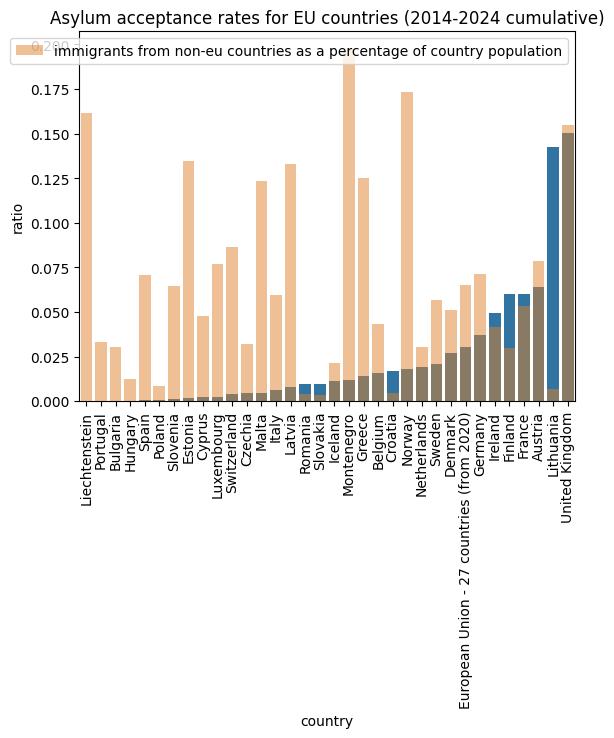

In [152]:
print(len(top))
top['OEUI_percentage'] = top['outside_EU_immigrants'] / top['population']
top.sort_values(by = 'b_ratio', inplace = True)

# just copying the previous bar plot:
a = sns.barplot(data = top, x = 'country', y = 'b_ratio')
a.set_ylabel('ratio')
a.set_title('Asylum acceptance rates for EU countries (2014-2024 cumulative)')
plt.xticks(rotation = 90)

# adding a new feature:
a = sns.barplot(data = top, x = 'country', y = 'OEUI_percentage',
                label = 'immigrants from non-eu countries as a percentage of country population',
                alpha = 0.5)

plt.xticks(rotation = 90)
pass

...Hypothesis proved false, there is no corellation between the proportion of immigrants in a country and its asylum acceptance rate...






Residence permits

Info k datam:

"Residence permit means any authorisation valid for at least 3 months issued by the authorities of a Member State allowing a third country national to stay legally on its territory. All valid permits on 31st December (end of the year). This data include statistics on all valid permits at the end of reference period, therefore including first permits, change of status or reasons to stay and renewed permits."

In [230]:
permits = pd.read_csv("../Data/Immigration/permits.csv")
permits.drop(columns = ['DATAFLOW', 'LAST UPDATE', 'freq', 'duration', 'unit', 'OBS_FLAG', 'CONF_STATUS', 'citizen' ], inplace = True)
permits.rename(columns = {'OBS_VALUE':'count', 'TIME_PERIOD':'year'}, inplace = True)
countries = set(permits['geo'])
permits = permits.pivot_table(index=["geo", "year"],
                         columns="reason",
                         values="count")
# data for remunerated activities is missing, but I will compute it from the others and total:
permits['Work reasons'] = permits['Total'] - permits['Education reasons'] - permits['Family reasons'] - permits['Other reason']
display(permits)

reason               Education reasons  Family reasons  Other reason  \
geo            year                                                    
Austria        2012            16955.0         75054.0      395161.0   
               2013            17960.0         77124.0      348981.0   
               2014            19538.0         72018.0      329813.0   
               2015            22474.0         76301.0      347497.0   
               2016            22497.0         80833.0      360987.0   
...                                ...             ...           ...   
United Kingdom 2014           513294.0        503225.0      121073.0   
               2015           517061.0        518268.0      135773.0   
               2016           507110.0        519618.0      107824.0   
               2017           523766.0        545778.0      102017.0   
               2018           467977.0        616125.0      110829.0   

reason                   Total  Work reasons  
geo            year                           
Austria        2012   493171.0        6001.0  
               2013   450410.0        6345.0  
               2014   427923.0        6554.0  
               2015   453069.0        6797.0  
               2016   471054.0        6737.0  
...                        ...           ...  
United Kingdom 2014  1509007.0      371415.0  
               2015  1544879.0      373777.0  
               2016  1504018.0      369466.0  
               2017  1533551.0      361990.0  
               2018  1577559.0      382628.0  

[371 rows x 5 columns]

<Axes: title={'center': 'Permits in Slovakia by reason'}, xlabel='Year', ylabel='Count'>

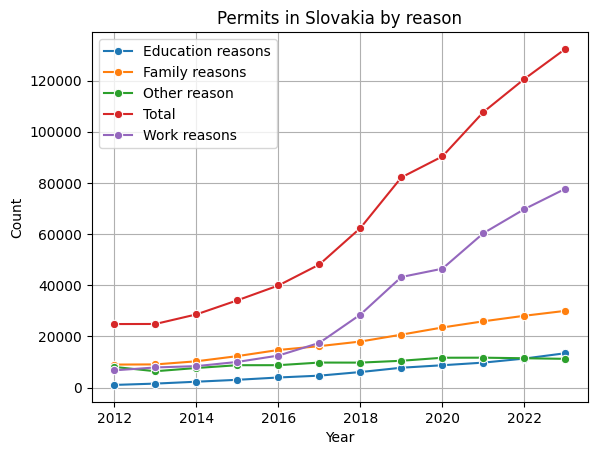

In [249]:
def draw_permits(country):
    # so that the permits are drawn each time into a new figure
    plt.figure()

    permits_in_country = permits.query('geo == @country')
    # display(permits_in_country)

    for column in permits_in_country.columns:
        if column not in ['year', 'geo']:  # Skip non-data columns
            plot = sns.lineplot(data = permits_in_country, x = 'year', y = column, label=column, marker='o')

    plt.xlabel("Year")
    plt.ylabel("Count")
    plt.title(f"Permits in {country} by reason")
    plt.legend()
    plt.grid(True)
    return plot

draw_permits('Slovakia')

In [250]:
# Let's find countries with the highest proportion of Residence Permits.
permits_in_2023 = permits.query("year == 2023").reset_index().rename(columns = {'geo':'country'})
#display(permits_in_2023)

popul_from_top = pd.Series(top['population'], index = top.index)
# display(popul_from_top)

# omg this is pure coding gold!!!
permits_with_pop = permits_in_2023.merge(popul_from_top, on = 'country', how = 'left')

# permits per population, here: ppp
permits_with_pop['ppp'] = permits_with_pop['Total'] / permits_with_pop['population']

display(permits_with_pop)

,country,year,Education reasons,Family reasons,Other reason,Total,Work reasons,population,ppp
0,Austria,2023,17669.0,96721.0,406185.0,535496.0,14921.0,8901064,0.060161
1,Belgium,2023,22336.0,295358.0,69819.0,517711.0,130198.0,11522440,0.044931
2,Bulgaria,2023,5067.0,33216.0,55651.0,109758.0,15824.0,6569275,0.016708
3,Croatia,2023,568.0,11268.0,12965.0,112428.0,87627.0,3933511,0.028582
4,Cyprus,2023,5116.0,26770.0,39850.0,132735.0,60999.0,888005,0.149476
5,Czechia,2023,26200.0,159608.0,144244.0,450024.0,119972.0,10693939,0.042082
6,Denmark,2023,13292.0,110439.0,164622.0,353886.0,65533.0,5822763,0.060776
7,Estonia,2023,1494.0,14074.0,160703.0,192250.0,15979.0,1328976,0.144660
8,European Union - 27 countries (from 2020),2023,1088875.0,8503699.0,6613156.0,25224272.0,9018542.0,447015600,0.056428
9,Finland,2023,20930.0,83918.0,39083.0,234076.0,90145.0,5525292,0.042364


21            Malta
18    Liechtenstein
4            Cyprus
7           Estonia
17           Latvia
Name: country, dtype: object

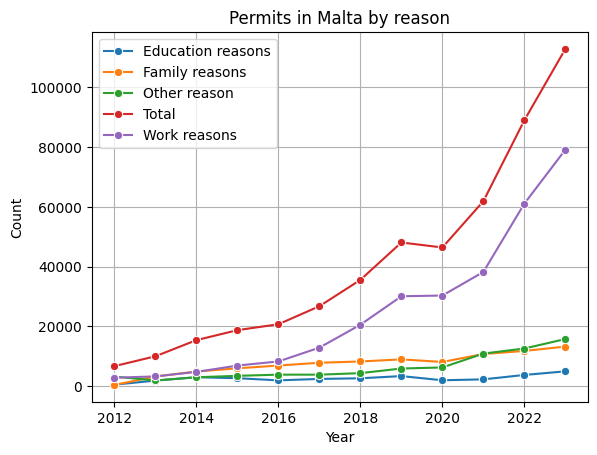

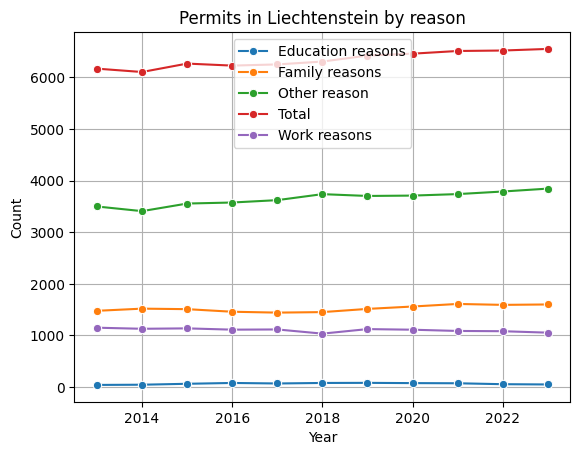

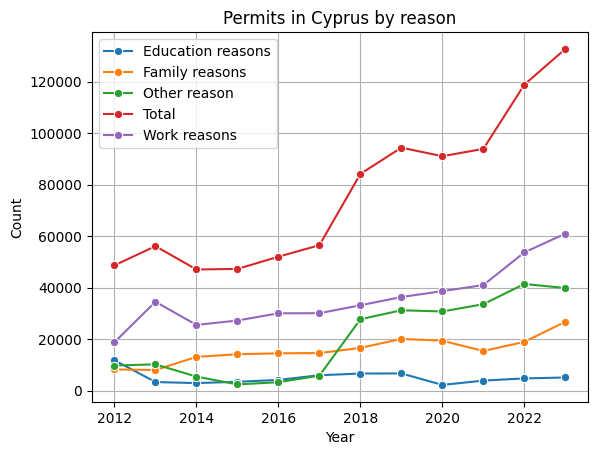

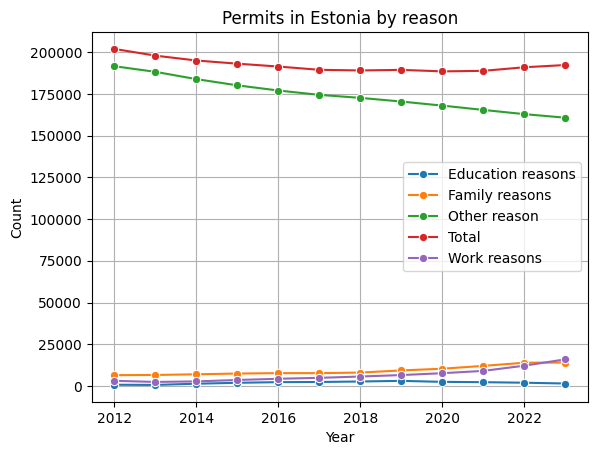

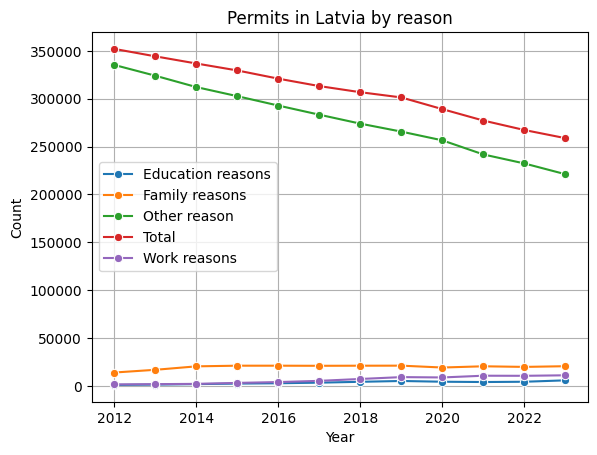

In [ ]:
permits_with_pop.sort_values(by = 'ppp', inplace = True, ascending=False)
highest = permits_with_pop[0:5]['country']
display(highest)
for c in highest:
    draw_permits(c)